In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Body Fat

# Problem Statement- Predicting BodyFat Basis On The Feature Provided.

# Read Data

In [2]:
bf=pd.read_csv(r"C:\Users\Lenovo\Desktop\edubridge dataset\Bodyfat.csv")
bf

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7
...,...,...,...,...,...,...,...,...,...,...
95,20.1,48,177.25,72.75,36.8,96.0,90.0,22.8,29.9,18.1
96,29.4,43,187.75,74.00,37.7,97.8,98.6,23.8,34.3,17.7
97,13.0,33,184.25,68.75,40.7,98.9,92.1,23.5,33.5,19.7
98,25.2,26,223.00,70.25,40.6,114.1,106.8,24.7,36.0,18.4


There are 9 Independent Features and 1 Dependent Feature.Objective is to use the Bodyfat feature as target feature for linear regression problem.

In [3]:
bf.shape

(100, 10)

In [4]:
#checking missing value
bf.isnull().sum()

Bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Ankle      0
Biceps     0
Wrist      0
dtype: int64

There is no missing value in data

In [5]:
#checking dtypes
bf.dtypes

Bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Ankle      float64
Biceps     float64
Wrist      float64
dtype: object

All feature are in float and int so no need to data type conversion

In [6]:
#checking skewness
bf.skew()

Bodyfat    0.071271
Age        0.202803
Weight     0.577483
Height     0.316043
Neck       0.186102
Chest      0.676916
Abdomen    0.616535
Ankle      0.672995
Biceps     0.151349
Wrist      0.548811
dtype: float64

No need to do skewness Treatment

In [7]:
bf1=bf.corr()
bf1

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
Bodyfat,1.000000,0.255798,0.595959,0.032210,0.504443,0.682266,0.811593,0.387911,0.418107,0.373095
Age,0.255798,1.000000,-0.097905,-0.268673,0.038501,0.072908,0.141339,-0.073522,-0.079398,0.216315
Weight,0.595959,-0.097905,1.000000,0.568433,0.838977,0.916047,0.888317,0.790388,0.786266,0.755123
Height,0.032210,-0.268673,0.568433,1.000000,0.370396,0.345312,0.265403,0.454985,0.435460,0.420928
Neck,0.504443,0.038501,0.838977,0.370396,1.000000,0.789799,0.769086,0.664068,0.701067,0.777259
Chest,0.682266,0.072908,0.916047,0.345312,0.789799,1.000000,0.922728,0.700092,0.730124,0.695795
Abdomen,0.811593,0.141339,0.888317,0.265403,0.769086,0.922728,1.000000,0.643211,0.652148,0.672061
Ankle,0.387911,-0.073522,0.790388,0.454985,0.664068,0.700092,0.643211,1.000000,0.650841,0.688320
Biceps,0.418107,-0.079398,0.786266,0.435460,0.701067,0.730124,0.652148,0.650841,1.000000,0.630473
Wrist,0.373095,0.216315,0.755123,0.420928,0.777259,0.695795,0.672061,0.688320,0.630473,1.000000


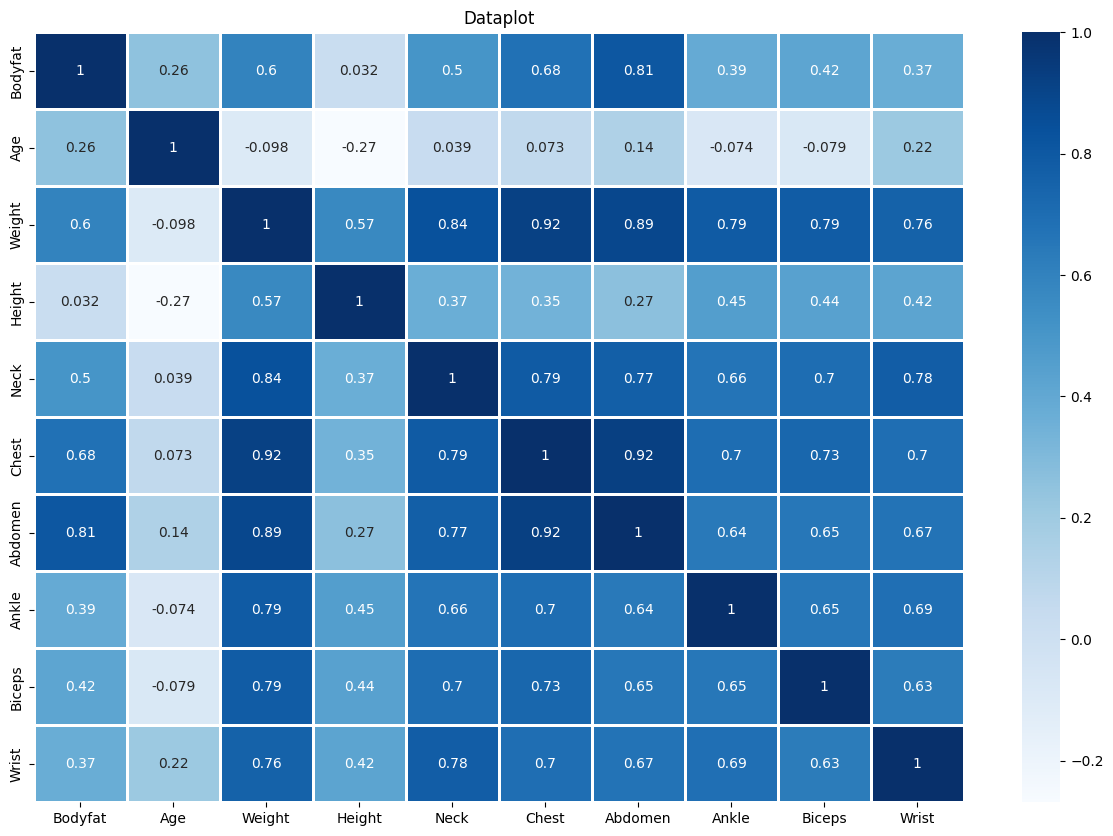

In [8]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(bf1,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Dataplot")
plt.show()

# Outlier Treatment

<AxesSubplot: >

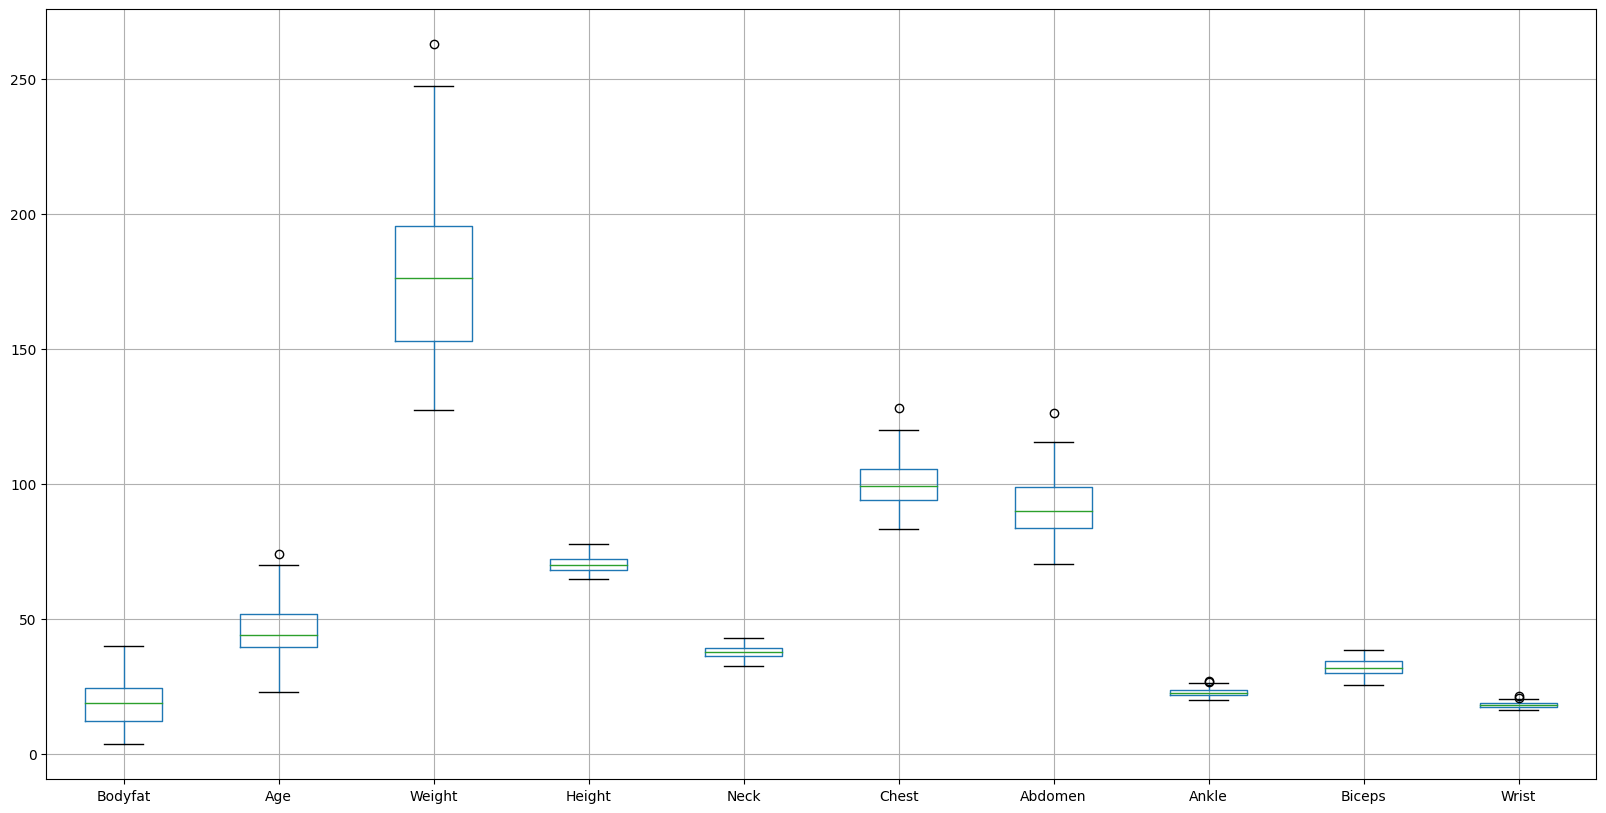

In [9]:
bf.boxplot(figsize=(20,10))

In the data there is Outlier Present in Feature Age,Weight,Chest,abdomen,wrist. so need to do outlier treatment.

<AxesSubplot: >

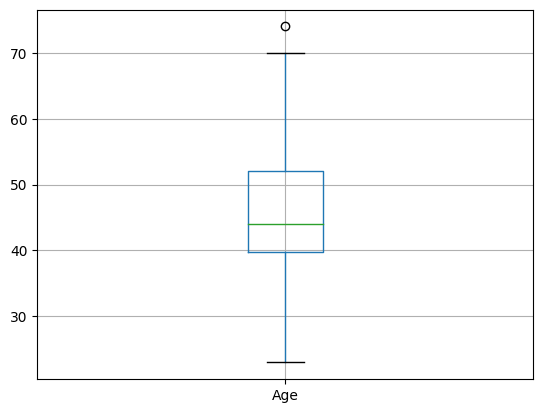

In [10]:
bf.boxplot(column="Age")

<AxesSubplot: xlabel='Age', ylabel='Density'>

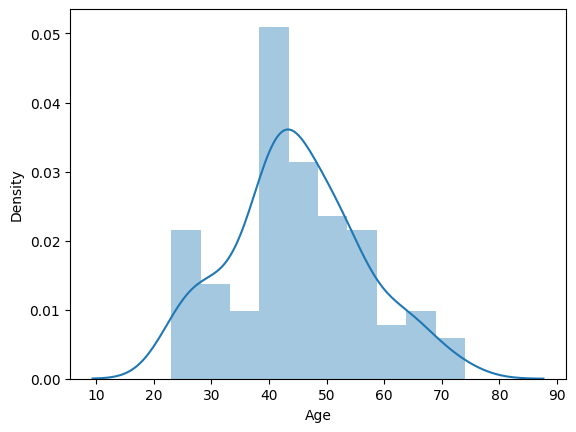

In [11]:
#bf.Age.hist(bins=50)
sns.distplot(bf["Age"])

In [12]:
bf.Age.describe()

count    100.000000
mean      44.880000
std       11.417937
min       23.000000
25%       39.750000
50%       44.000000
75%       52.000000
max       74.000000
Name: Age, dtype: float64

In [13]:
u_age=bf["Age"].mean()+3*bf["Age"].std()
u_age

79.13381199755199

In [14]:
bf.loc[bf["Age"]>79,"Age"]=79

<AxesSubplot: xlabel='Age', ylabel='Density'>

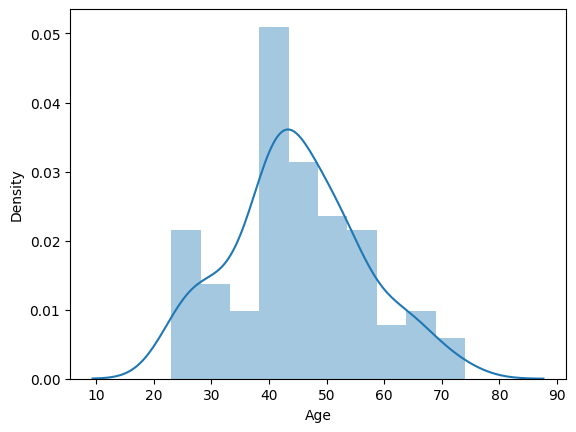

In [15]:
sns.distplot(bf["Age"])

<AxesSubplot: >

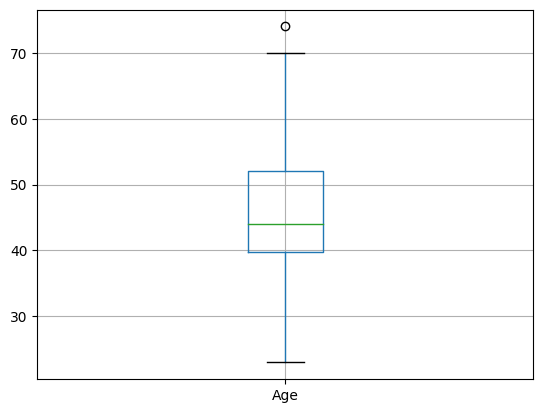

In [16]:
bf.boxplot(column="Age")

<AxesSubplot: >

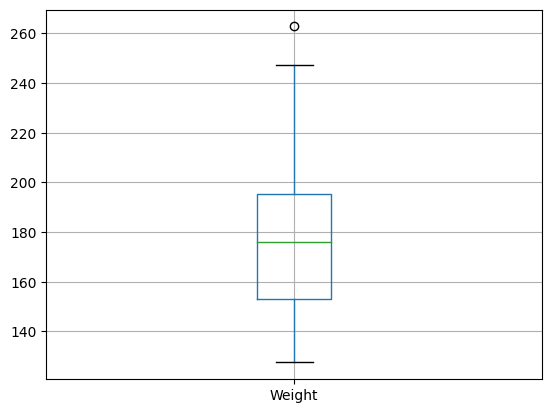

In [17]:
bf.boxplot(column="Weight")

<AxesSubplot: xlabel='Weight', ylabel='Density'>

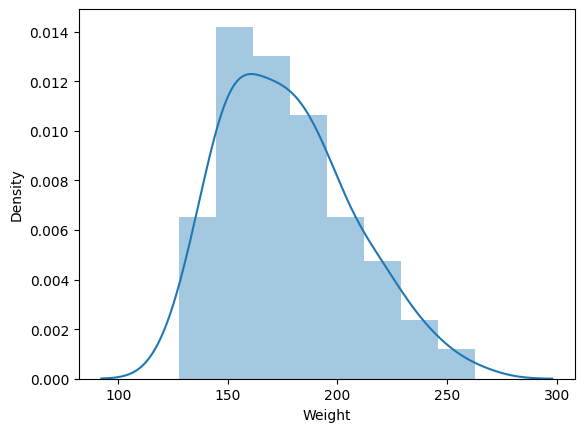

In [18]:
sns.distplot(bf["Weight"])

In [19]:
bf.Weight.describe()

count    100.000000
mean     177.451500
std       29.508013
min      127.500000
25%      152.937500
50%      176.125000
75%      195.437500
max      262.750000
Name: Weight, dtype: float64

In [20]:
u_weight=bf["Weight"].mean()+3*bf["Weight"].std()
u_weight

265.97554001944127

In [21]:
bf.loc[bf["Weight"]>265,"Weight"]=265

<AxesSubplot: xlabel='Weight', ylabel='Density'>

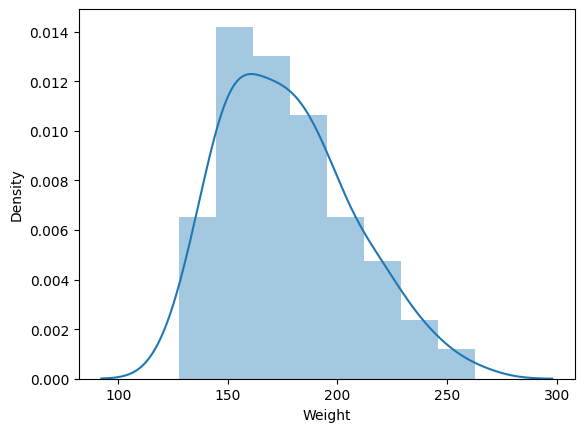

In [22]:
sns.distplot(bf["Weight"])

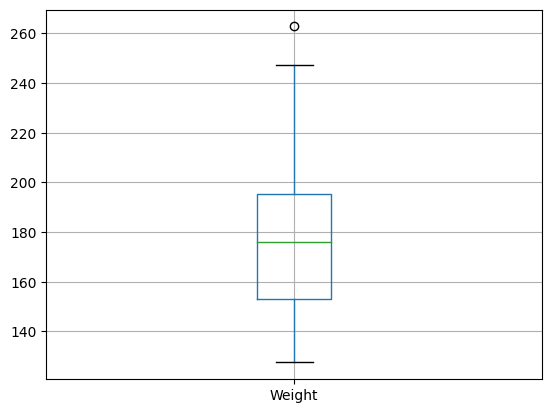

In [23]:
box=bf.boxplot(column="Weight")

<AxesSubplot: >

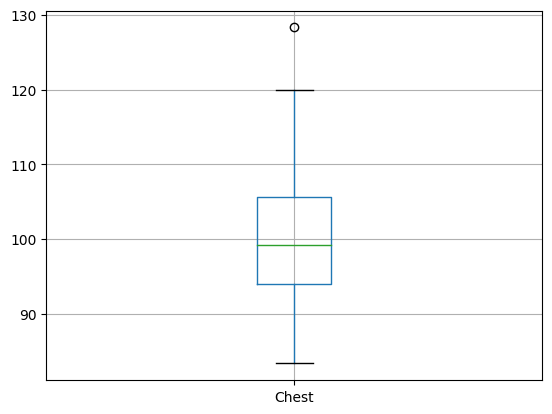

In [24]:
bf.boxplot(column="Chest")

<AxesSubplot: xlabel='Chest', ylabel='Density'>

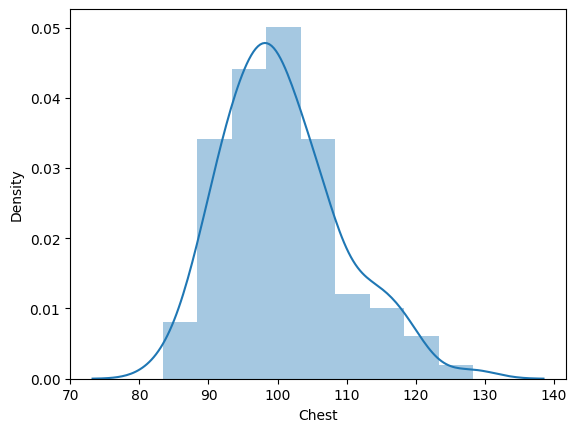

In [25]:
sns.distplot(bf["Chest"])

In [26]:
bf.Chest.describe()

count    100.000000
mean     100.681000
std        8.516493
min       83.400000
25%       94.000000
50%       99.250000
75%      105.600000
max      128.300000
Name: Chest, dtype: float64

In [27]:
u_chest=bf["Chest"].mean()+3*bf["Chest"].std()
u_chest

126.23047766767273

In [28]:
bf.loc[bf["Chest"]>126,"Chest"]=126

<AxesSubplot: xlabel='Chest', ylabel='Density'>

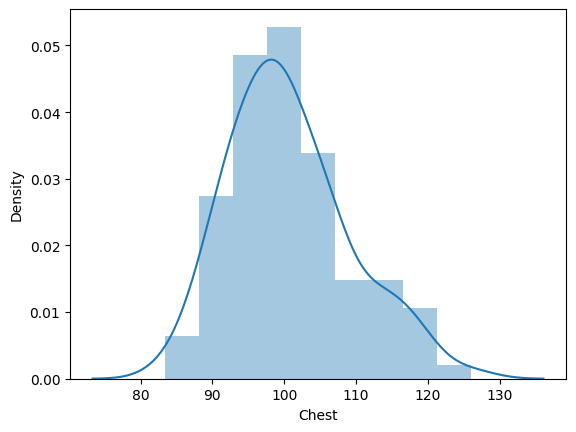

In [29]:
sns.distplot(bf["Chest"])

<AxesSubplot: >

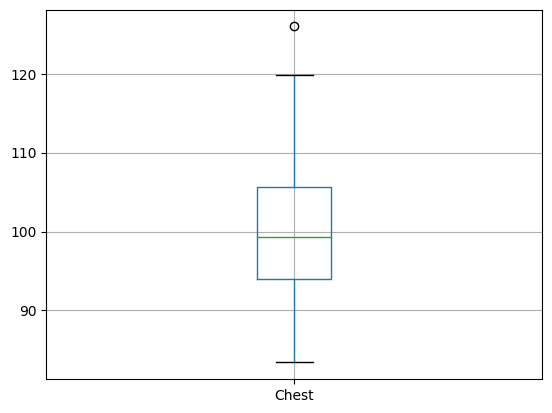

In [30]:
bf.boxplot(column="Chest")

<AxesSubplot: >

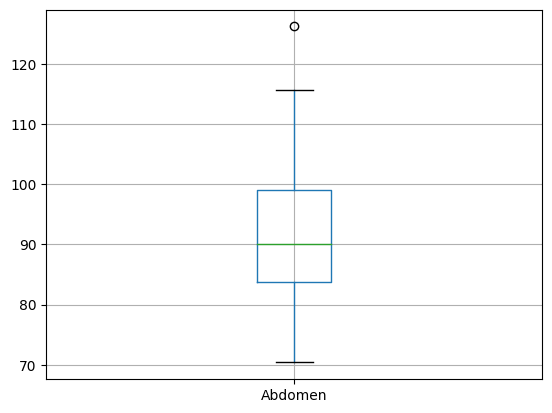

In [31]:
bf.boxplot(column="Abdomen")

<AxesSubplot: xlabel='Abdomen', ylabel='Density'>

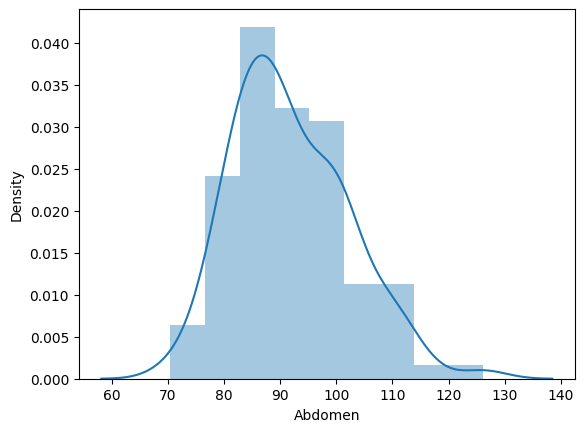

In [32]:
sns.distplot(bf["Abdomen"])

In [33]:
bf.Abdomen.describe()

count    100.000000
mean      91.867000
std       10.261235
min       70.400000
25%       83.825000
50%       90.150000
75%       98.975000
max      126.200000
Name: Abdomen, dtype: float64

In [34]:
u_Abdomen=bf["Abdomen"].mean()+3*bf["Abdomen"].std()
u_Abdomen

122.65070451450512

In [35]:
bf.loc[bf["Abdomen"]>122,"Abdomen"]=122

<AxesSubplot: xlabel='Abdomen', ylabel='Density'>

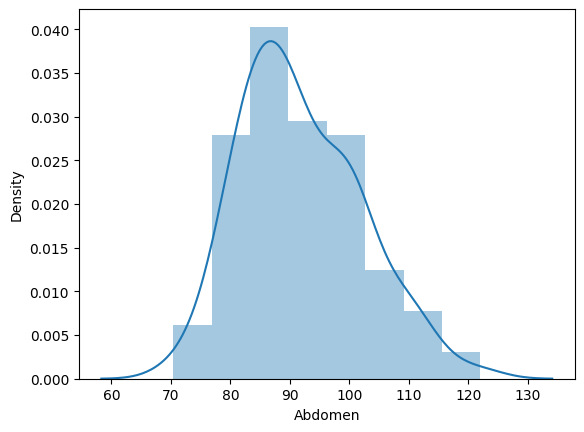

In [36]:
sns.distplot(bf["Abdomen"])

<AxesSubplot: >

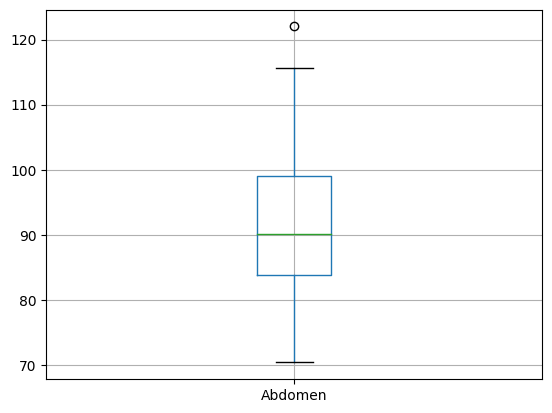

In [37]:
bf.boxplot(column="Abdomen")

<AxesSubplot: >

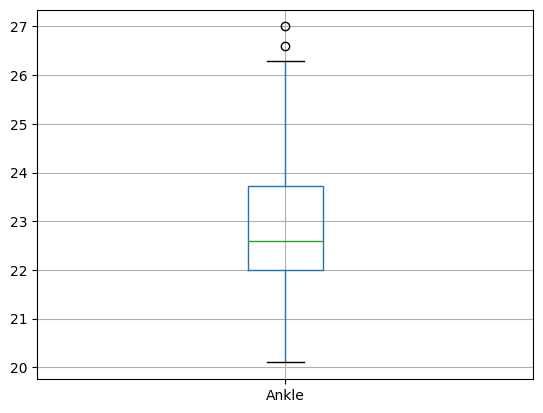

In [38]:
bf.boxplot(column="Ankle")

<AxesSubplot: xlabel='Ankle', ylabel='Density'>

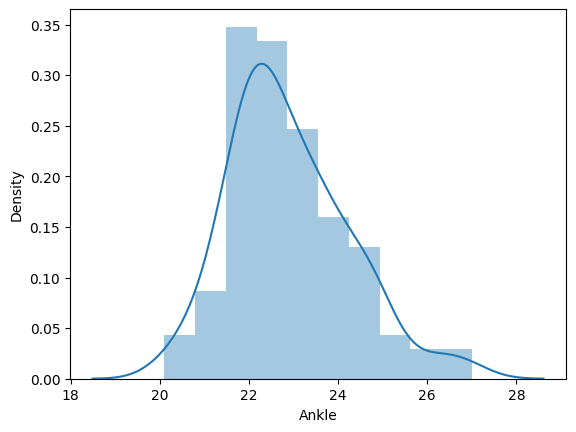

In [39]:
sns.distplot(bf["Ankle"])

In [40]:
bf.Ankle.describe()

count    100.000000
mean      22.900000
std        1.346451
min       20.100000
25%       22.000000
50%       22.600000
75%       23.725000
max       27.000000
Name: Ankle, dtype: float64

In [41]:
u_Ankle=bf["Ankle"].mean()+3*bf["Ankle"].std()
u_Ankle

26.939351883206474

In [42]:
bf.loc[bf["Ankle"]>26,"Ankle"]=26

<AxesSubplot: xlabel='Ankle', ylabel='Density'>

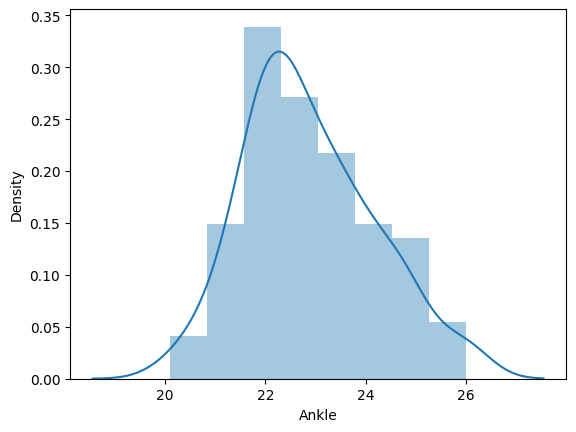

In [43]:
sns.distplot(bf["Ankle"])

<AxesSubplot: >

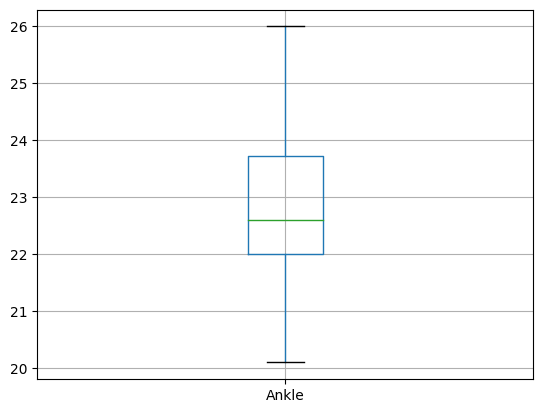

In [44]:
bf.boxplot(column="Ankle")

<AxesSubplot: >

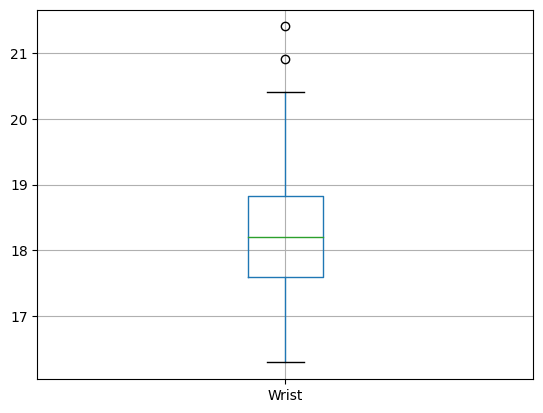

In [45]:
bf.boxplot(column="Wrist")

<AxesSubplot: xlabel='Wrist', ylabel='Density'>

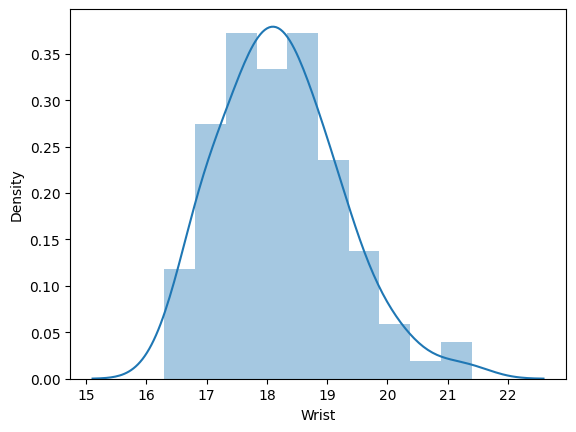

In [46]:
sns.distplot(bf["Wrist"])

In [47]:
bf.Wrist.describe()

count    100.000000
mean      18.221000
std        0.999322
min       16.300000
25%       17.600000
50%       18.200000
75%       18.825000
max       21.400000
Name: Wrist, dtype: float64

In [48]:
u_Wrist=bf["Wrist"].mean()+3*bf["Wrist"].std()
u_Wrist

21.21896749330427

In [49]:
bf.loc[bf["Wrist"]>21,"Wrist"]=21

<AxesSubplot: xlabel='Wrist', ylabel='Density'>

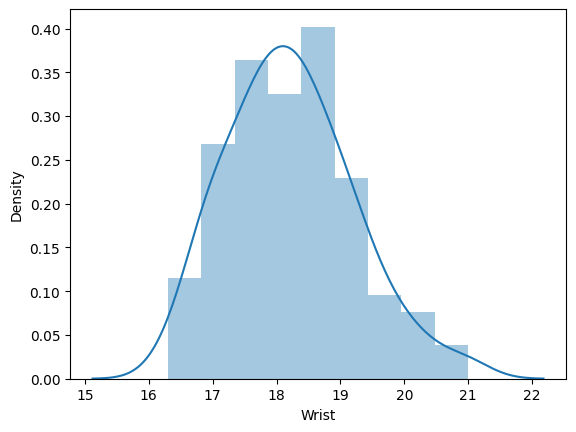

In [50]:
sns.distplot(bf["Wrist"])

<AxesSubplot: >

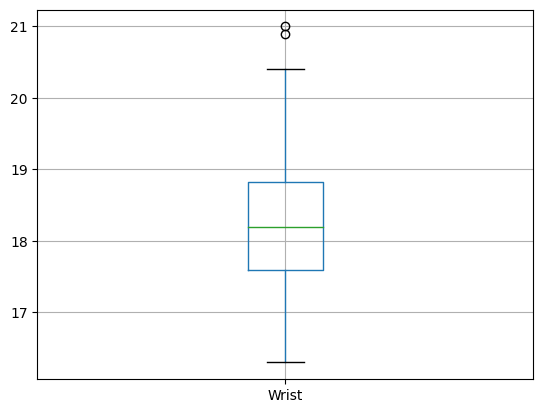

In [51]:
bf.boxplot(column="Wrist")

# Data Splitting

In [52]:
bf_x=bf.iloc[:,1:]
bf_y=bf.iloc[:,0]

In [53]:
bf_x.head(2)

,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,41,247.25,73.5,42.1,117.0,115.6,26.0,37.3,19.7
1,31,177.25,71.5,36.2,101.1,92.4,24.6,30.1,18.2


In [54]:
import sklearn
from sklearn.model_selection import train_test_split

In [55]:
bf_x_train,bf_x_test,bf_y_train,bf_y_test=train_test_split(bf_x,bf_y,test_size=0.2,random_state=101)

In [56]:
bf_x_train.shape,bf_y_test.shape,bf_y_train.shape,bf_y_test.shape

((80, 9), (20,), (80,), (20,))

# Linear Regression

In [57]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [58]:
lin.fit(bf_x_train,bf_y_train)

LinearRegression()

In [59]:
lin_pred=lin.predict(bf_x_test)
lin_pred

array([15.62868508, 18.50227407, 26.01072791,  9.32019171, 17.11854745,
       15.56906412, 15.68856397, 21.04816179, 26.21535457, 16.26180114,
       18.13037093, 39.42641631, 20.18594874,  8.81893695, 15.02528605,
       20.27954189, 11.06833081, 23.37796131, 15.04515056, 11.72589   ])

In [60]:
lin.intercept_

-28.55371319799494

In [61]:
lin.coef_

array([ 0.05361616, -0.10623438, -0.0814925 , -0.00579934, -0.03463126,
        0.98550881,  0.2578369 ,  0.08299537, -1.4362726 ])

In [62]:
R2=lin.score(bf_x_train,bf_y_train)
R2

0.7376860854876937

In [63]:
AdjR2=1-(((1-R2)*(80-1))/(80-9-1))
AdjR2

0.7039600107646828

In [64]:
pred_train=lin.predict(bf_x_train)
pred_train

array([16.95067467, 33.77550558, 12.72300031, 26.37843337, 16.4234023 ,
       12.80802482, 30.16106938, 18.46593688, 16.77454332, 25.17600463,
       17.65931057,  6.5599486 , 12.09914127, 35.52439123, 29.58594668,
        9.31971826, 19.54240125, 15.67161739, 27.0021732 , 26.5258821 ,
       22.99166512, 22.82535043, 15.27391308, 26.42241314,  6.41295661,
       23.60593134, 11.67455606, 27.41964113, 13.61305007, 25.62508047,
       20.01891715,  8.24530533, 18.69936232, 24.37041304, 24.90266191,
       14.90295565, 15.40686179, 13.3137471 , 16.91711653, 22.39100314,
       21.06435528, 16.6789027 , 22.35720229, 24.95443467,  8.47481606,
       20.38893858, 18.71940546, 15.36337995, 14.81725264, 10.17117778,
        7.03059698, 15.00082112, 32.52212461, 26.27230009, 16.51334752,
       15.81339872, 15.09222468, 10.74688181, 13.90303303, 23.13477358,
       29.12572928, 16.92152763,  9.21121751, 16.85905709, 23.53924873,
        7.13879909, 19.122893  , 16.3936614 ,  5.0176579 , 22.74

In [65]:
mean_y_value=bf_y_train.mean()
#mean_y_value

In [66]:
print("mean is---",mean_y_value)

mean is--- 18.53375


In [67]:
SSE=np.sum(np.square(pred_train-bf_y_train))
SSE

1295.8251963093494

In [68]:
SSR=np.sum(np.square(pred_train-mean_y_value))
SSR

3644.153678690671

In [69]:
r2=SSR/(SSR+SSE)
r2

0.7376860854876947

In [70]:
#mean absolute error
#lin_pred
error=bf_y_test-lin_pred
error

16   -4.328685
1     3.997726
43    6.789272
67   -3.720192
89    0.281453
21   -0.669064
97   -2.688564
51    4.151838
6     2.484645
41    0.438199
82   -1.530371
25    0.673584
45    7.014051
68    6.781063
37   -3.525286
31   -1.979542
50   -1.168331
32    0.822039
3    -2.745151
48    1.874110
Name: Bodyfat, dtype: float64

In [71]:
error_a=np.abs(error)
error_a

16    4.328685
1     3.997726
43    6.789272
67    3.720192
89    0.281453
21    0.669064
97    2.688564
51    4.151838
6     2.484645
41    0.438199
82    1.530371
25    0.673584
45    7.014051
68    6.781063
37    3.525286
31    1.979542
50    1.168331
32    0.822039
3     2.745151
48    1.874110
Name: Bodyfat, dtype: float64

In [72]:
MAE=np.mean(error_a)
MAE

2.883158244368931

In [73]:
#mean square error
error=bf_y_test-lin_pred
error

16   -4.328685
1     3.997726
43    6.789272
67   -3.720192
89    0.281453
21   -0.669064
97   -2.688564
51    4.151838
6     2.484645
41    0.438199
82   -1.530371
25    0.673584
45    7.014051
68    6.781063
37   -3.525286
31   -1.979542
50   -1.168331
32    0.822039
3    -2.745151
48    1.874110
Name: Bodyfat, dtype: float64

In [74]:
Error2=error*error
Error2

16    18.737514
1     15.981813
43    46.094216
67    13.839826
89     0.079216
21     0.447647
97     7.228376
51    17.237761
6      6.173463
41     0.192018
82     2.342035
25     0.453715
45    49.196915
68    45.982816
37    12.427642
31     3.918586
50     1.364997
32     0.675748
3      7.535852
48     3.512288
Name: Bodyfat, dtype: float64

In [75]:
MSE=np.mean(Error2)
MSE

12.671122142458815

In [76]:
#RMSE
RMSE=np.sqrt(MSE)
RMSE

3.5596519692884043

In [77]:
#MAPE
MAPE=np.mean(error_a/bf_y_test)*100
MAPE

18.533713375673248

In [78]:
from sklearn import metrics

In [79]:
bf_MAE=metrics.mean_absolute_error(bf_y_test,lin_pred)
bf_MAE

2.883158244368931

In [80]:
bf_MSE=metrics.mean_squared_error(bf_y_test,lin_pred)
bf_MSE

12.671122142458815

In [81]:
bf_RMSE=pow(bf_MSE,0.5)
bf_RMSE

3.5596519692884043

In [82]:
df2=pd.DataFrame({"Actual":bf_y_test,"predicted":lin_pred})
df2

,Actual,predicted
16,11.3,15.628685
1,22.5,18.502274
43,32.8,26.010728
67,5.6,9.320192
89,17.4,17.118547
21,14.9,15.569064
97,13.0,15.688564
51,25.2,21.048162
6,28.7,26.215355
41,16.7,16.261801


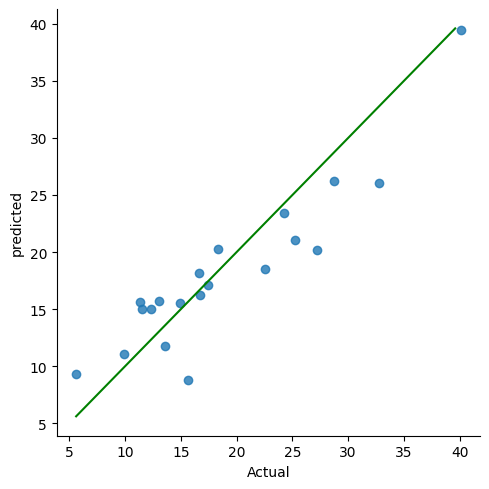

In [83]:
sns.lmplot(x="Actual",y="predicted",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# LASSO(L1)

In [84]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [85]:
lasso.fit(bf_x_train,bf_y_train)

Lasso()

In [86]:
lasso.coef_

array([ 0.02022529, -0.12524095, -0.        , -0.        ,  0.        ,
        0.93918525, -0.        , -0.        , -0.        ])

In [87]:
l_p=lasso.predict(bf_x_test)
l_p

array([15.62548199, 18.74725348, 25.20657997, 10.3942433 , 19.66103466,
       15.40102266, 17.62926184, 20.60978678, 26.12738706, 15.89289487,
       18.7279148 , 36.73644961, 18.65666582,  8.35420456, 14.60954074,
       19.99375601, 10.66690729, 23.78133198, 14.7038592 , 12.04571244])

In [88]:
l_R2=lasso.score(bf_x_train,bf_y_train)
l_R2

0.726157536159219

In [89]:
l_adjR2=1-(((1-l_R2)*(80-1)/(80-9-1)))
l_adjR2

0.69094921937969

In [90]:
#l_MSE
l_MSE=metrics.mean_squared_error(bf_y_test,l_p)
l_MSE

16.569915605774423

In [91]:
#l_RMSE
l_RMSE=pow(l_MSE,0.5)
l_RMSE

4.0706161211510015

In [92]:
df1=pd.DataFrame({"Actual":bf_y_test,"predicted":l_p})
df1

,Actual,predicted
16,11.3,15.625482
1,22.5,18.747253
43,32.8,25.206580
67,5.6,10.394243
89,17.4,19.661035
21,14.9,15.401023
97,13.0,17.629262
51,25.2,20.609787
6,28.7,26.127387
41,16.7,15.892895


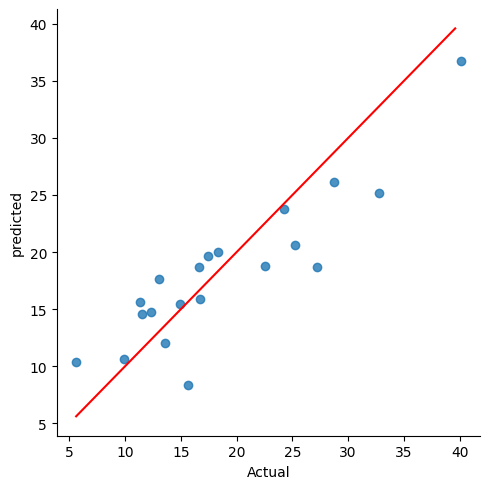

In [93]:
sns.lmplot(x="Actual",y="predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")
plt.show()

In [94]:
df=pd.DataFrame({"Importances":list(lasso.coef_),"columns":list(bf_x)})

In [95]:
df

,Importances,columns
0,0.020225,Age
1,-0.125241,Weight
2,-0.000000,Height
3,-0.000000,Neck
4,0.000000,Chest
5,0.939185,Abdomen
6,-0.000000,Ankle
7,-0.000000,Biceps
8,-0.000000,Wrist


In [96]:
new_data=pd.DataFrame(bf,columns=["Age","Abdomen","Weight"])
new_data

,Age,Abdomen,Weight
0,41,115.6,247.25
1,31,92.4,177.25
2,42,86.0,156.25
3,23,85.2,154.25
4,46,95.6,177.00
...,...,...,...
95,48,90.0,177.25
96,43,98.6,187.75
97,33,92.1,184.25
98,26,106.8,223.00


In [97]:
new_data["Bodyfat"]=bf["Bodyfat"]

In [98]:
new_data

,Age,Abdomen,Weight,Bodyfat
0,41,115.6,247.25,32.3
1,31,92.4,177.25,22.5
2,42,86.0,156.25,22.0
3,23,85.2,154.25,12.3
4,46,95.6,177.00,20.5
...,...,...,...,...
95,48,90.0,177.25,20.1
96,43,98.6,187.75,29.4
97,33,92.1,184.25,13.0
98,26,106.8,223.00,25.2


In [99]:
new_x=new_data.iloc[:,0:3]
new_y=new_data.iloc[:,-1]

In [100]:
new_x.head(2)

,Age,Abdomen,Weight
0,41,115.6,247.25
1,31,92.4,177.25


In [101]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(new_x,new_y,test_size=0.2,random_state=101)

In [102]:
new_x_train.shape,new_x_test.shape,new_y_train.shape,new_y_test.shape

((80, 3), (20, 3), (80,), (20,))

In [103]:
lin.fit(new_x_train,new_y_train)

LinearRegression()

In [104]:
new_pr=lin.predict(new_x_test)
new_pr

array([15.55911059, 18.97429921, 25.49464126, 10.24653773, 18.95174131,
       15.38094287, 17.62863973, 20.34944972, 26.46303223, 16.05143116,
       18.29998498, 38.02052592, 18.72501661,  8.26690681, 14.84614376,
       20.26642446, 10.61844556, 23.93245513, 15.04664009, 11.86537926])

In [105]:
lin.intercept_

-48.62712583101995

In [106]:
lin.coef_

array([ 0.0085469 ,  1.01846968, -0.15103034])

In [107]:
n_R2=lin.score(new_x_train,new_y_train)
n_R2

0.7276726661543564

In [108]:
adj_n_R2=1-(((1-n_R2)*(80-1))/(80-3-1))
adj_n_R2

0.716922902976239

In [109]:
new_MSE=metrics.mean_squared_error(new_y_test,new_pr)
new_MSE

15.878156731113702

# Ridge(L2)

In [110]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [111]:
rd.fit(bf_x_train,bf_y_train)

Ridge()

In [112]:
rd_pred=rd.predict(bf_x_test)
rd_pred

array([15.61974828, 18.5226954 , 25.95666281,  9.3769429 , 17.20015162,
       15.54607136, 15.76632648, 21.01775717, 26.23410295, 16.25027561,
       18.12195634, 39.35608049, 20.11217738,  8.81560445, 15.02433464,
       20.29259485, 11.03863326, 23.43019556, 15.04703072, 11.75735814])

In [113]:
list(rd.coef_)

[0.051909206901980094,
 -0.10627128728116819,
 -0.08404872164478742,
 -0.019432874169205274,
 -0.03345731031819646,
 0.9845757540733747,
 0.24092151188261532,
 0.080034760709805,
 -1.363541498342812]

In [114]:
rd_df=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(bf_x)})

In [115]:
rd_R2=rd.score(bf_x_train,bf_y_train)
rd_R2

0.7376650232604984

In [116]:
rd_a_R2=1-(((1-rd_R2)*(80-1))/(80-9-1))
rd_a_R2           

0.7039362405368482

In [117]:
r_MSE=metrics.mean_squared_error(bf_y_test,rd_pred)
r_MSE

12.790834199408575

In [118]:
r_RMSE=pow(r_MSE,0.5)
r_RMSE

3.5764275750263104

In [119]:
list1=["linear","Lasso","Ridge"]
list2=[R2,l_R2,rd_R2]
list3=[l_adjR2,l_adjR2,rd_a_R2]
list4=[MSE,l_MSE,r_MSE]

In [120]:
final_result=pd.DataFrame({"Modelname":list1,"R-square":list2,"AdjR2":list3,"MSE":list4})
final_result

,Modelname,R-square,AdjR2,MSE
0,linear,0.737686,0.690949,12.671122
1,Lasso,0.726158,0.690949,16.569916
2,Ridge,0.737665,0.703936,12.790834


# MSE is low with basic linear regression model so this is the best fitted model for this dataset